In [1]:
!pip uninstall keras
!pip install git+git://github.com/keras-team/keras.git

Uninstalling Keras-2.2.4:
  Would remove:
    /usr/local/lib/python3.6/dist-packages/Keras-2.2.4.dist-info/*
    /usr/local/lib/python3.6/dist-packages/docs/*
    /usr/local/lib/python3.6/dist-packages/keras/*
  Would not remove (might be manually added):
    /usr/local/lib/python3.6/dist-packages/docs/md_autogen.py
    /usr/local/lib/python3.6/dist-packages/docs/update_docs.py
Proceed (y/n)? y
  Successfully uninstalled Keras-2.2.4
  Cloning git://github.com/keras-team/keras.git to /tmp/pip-req-build-dtn5erwo
  Running command git clone -q git://github.com/keras-team/keras.git /tmp/pip-req-build-dtn5erwo
  Stored in directory: /tmp/pip-ephem-wheel-cache-0k_04m7j/wheels/e6/02/ad/5e8e1a5824af71082e2260fe7e2eaa1b745c34706e6ff0a14b
Successfully built Keras


In [2]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

import urllib.request
import os

base_url = 'http://download.tensorflow.org/models/object_detection/'
file_name = 'ssd_mobilenet_v1_coco_2018_01_28.tar.gz'

url = base_url + file_name

urllib.request.urlretrieve(url, file_name)

os.listdir()

['.config',
 'trashnet.zip',
 'labels.txt',
 'testing.zip',
 'ssd_mobilenet_v1_coco_2018_01_28.tar.gz',
 'sample_data']

In [0]:
import tarfile
import shutil

dir_name = file_name[0:-len('.tar.gz')]

if os.path.exists(dir_name):
    shutil.rmtree(dir_name)
  
tarfile.open(file_name, 'r:gz').extractall('./')

In [4]:
frozen_graph = os.path.join(dir_name, 'frozen_inference_graph.pb')

with tf.gfile.FastGFile(frozen_graph,'rb') as f:
    graph_def = tf.GraphDef()
    graph_def.ParseFromString(f.read())

W0716 02:40:38.150478 139708240443264 deprecation.py:323] From <ipython-input-4-4a48092c59e6>:3: FastGFile.__init__ (from tensorflow.python.platform.gfile) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.gfile.GFile.


In [0]:
from zipfile import ZipFile

with ZipFile("testing.zip", "r") as zipObj:
    zipObj.extractall()

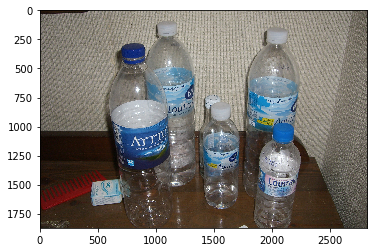

In [81]:
input_image = []

image = cv.imread('testing/testing1.jpg')
image = cv.cvtColor(image, cv.COLOR_BGR2RGB)
input_image.append(image)

plt.imshow(image)
plt.show()

In [0]:
outputs = ('num_detections',
           'detection_classes',
           'detection_scores',
           'detection_boxes')

In [0]:
labels = {}

with open("labels.txt", "r") as f:
    for name in f:
        key, _, value = name.partition(':')
        value, _, _ = value.partition('\n')
        labels[key] = value

In [0]:
with tf.Session() as sess:
  sess.graph.as_default()
  tf.import_graph_def(graph_def, name="")

  detections = sess.run([sess.graph.get_tensor_by_name(f'{op}:0') for op in outputs],
      feed_dict={ 'image_tensor:0': input_image })

In [0]:
num_detections = detections[0]
detection_classes = detections[1]
detection_scores = detections[2]
detection_boxes = detections[3]

In [87]:
num_detections[0]

11.0

In [88]:
for classes in detection_classes[0]:
    if classes != 1:
        print(labels[str(int(classes))])

 bottle
 bottle
 dining table
 bottle
 bottle
 bottle
 bottle
 bottle
 bottle
 cup
 bottle


In [89]:
for i in range(int(num_detections[0])):
    print(detection_scores[0][i])

0.8209363
0.7626431
0.7388495
0.6845447
0.6555418
0.56084645
0.54143214
0.4057744
0.36154315
0.34845614
0.31407213


Number of confident detections: 7


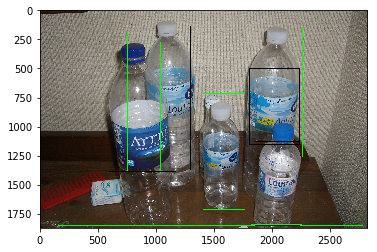

In [91]:
image_copy = np.copy(input_image[0])
image_box = np.copy(input_image[0])

height = image_copy.shape[0]
width = image_copy.shape[1]

cropped_images = []
cropped_count = 0

for x in range(0,int(num_detections)):
    left = int(width*detection_boxes[0][x][1])
    top = int(height*detection_boxes[0][x][0])
    right = int(width*detection_boxes[0][x][3])
    bottom = int(height*detection_boxes[0][x][2])
    
    if detection_scores[0][x] >= 0.5:
        cropped = image_copy[top:bottom, left:right]
        cv.imwrite("{}{}".format(labels[str(int(detection_classes[0][x]))], x+1) + '.png', cropped)
        cropped_images.append(cropped)
        cropped_count += 1
        
        cv.rectangle(image_box,
                     (left, top),
                     (right, bottom),
                     [0,255,0],
                     thickness=2)
        
    else:
        cv.rectangle(image_box,
                     (left, top),
                     (right, bottom),
                     [0,0,0],
                     thickness=2)

if cropped_count == 0:
    print("Use another image")
else:
    plt.imshow(image_box)
    print("Number of confident detections: {}".format(cropped_count))

In [92]:
[os.remove(images) for images in os.listdir() if images.endswith('.png')]

[None, None, None, None, None, None, None]

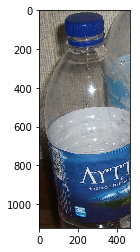

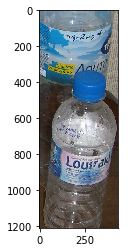

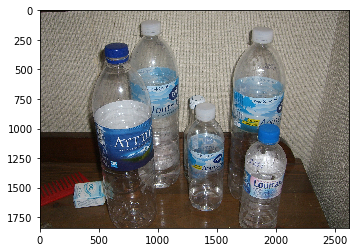

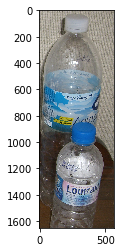

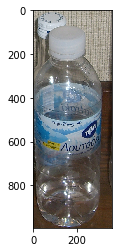

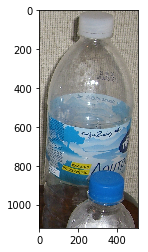

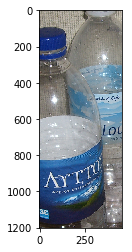

In [93]:
for images in cropped_images:
    plt.imshow(images)
    plt.show()

In [17]:
import keras
from keras.applications import MobileNetV2

base_model = MobileNetV2(weights='imagenet', include_top=False)

Using TensorFlow backend.
/usr/local/lib/python3.6/dist-packages/keras_applications/mobilenet_v2.py:294: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  warnings.warn('`input_shape` is undefined or non-square, '
W0716 02:41:24.753203 139708240443264 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0716 02:41:24.754490 139708240443264 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:529: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0716 02:41:24.763235 139708240443264 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4420: The name tf.random_uniform is de

9412608/9406464 [==============================] - 0s 0us/step


In [0]:
from keras.models import Model
from keras.layers import Dense, GlobalAveragePooling2D

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024,activation='relu')(x)
x = Dense(1024,activation='relu')(x)
x = Dense(512,activation='relu')(x)
preds = Dense(3,activation='softmax')(x)

model = Model(inputs=base_model.input,
              outputs=preds)

for layer in model.layers[:20]:
  layer.trainable = False
for layer in model.layers[20:]:
  layer.trainable = True

In [0]:
for i, layer in enumerate(model.layers):
    print(i, layer.name)

In [0]:
with ZipFile('trashnet.zip', 'r') as zipObj:
    zipObj.extractall()

In [20]:
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.mobilenet import preprocess_input

datagen = ImageDataGenerator(preprocessing_function=preprocess_input,
                             rescale=1./255,
                             validation_split=0.2)

train_generator = datagen.flow_from_directory('trashnet',
                                              target_size=(224,224),
                                              color_mode='rgb',
                                              batch_size=32,
                                              class_mode='categorical',
                                              subset='training',
                                              shuffle=True)

val_generator = datagen.flow_from_directory('trashnet',
                                            target_size=(224,224),
                                            color_mode='rgb',
                                            batch_size=32,
                                            class_mode='categorical',
                                            subset='validation',
                                            shuffle=True)

Found 1200 images belonging to 3 classes.
Found 300 images belonging to 3 classes.


In [21]:
from keras.optimizers import Adam

model.compile(optimizer='Adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_generator,
                    epochs=10,
                    validation_data=val_generator)

W0716 02:41:48.458712 139708240443264 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:793: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0716 02:41:48.662516 139708240443264 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/10
38/38 [==============================] - 23s 595ms/step - loss: 0.7076 - acc: 0.7434 - val_loss: 1.6107 - val_acc: 0.3333
Epoch 2/10
38/38 [==============================] - 11s 300ms/step - loss: 0.3706 - acc: 0.8693 - val_loss: 1.2361 - val_acc: 0.3333
Epoch 3/10
38/38 [==============================] - 11s 300ms/step - loss: 0.2730 - acc: 0.9112 - val_loss: 4.4529 - val_acc: 0.3333
Epoch 4/10
38/38 [==============================] - 11s 299ms/step - loss: 0.2929 - acc: 0.9030 - val_loss: 9.9969 - val_acc: 0.3333
Epoch 5/10
38/38 [==============================] - 11s 300ms/step - loss: 0.2552 - acc: 0.9153 - val_loss: 9.0944 - val_acc: 0.3333
Epoch 6/10
38/38 [==============================] - 11s 302ms/step - loss: 0.2502 - acc: 0.9350 - val_loss: 4.7564 - val_acc: 0.3333
Epoch 7/10
38/38 [==============================] - 11s 301ms/step - loss: 0.1646 - acc: 0.9457 - val_loss: 5.8130 - val_acc: 0.3333
Epoch 8/10
38/38 [==============================] - 11s 301ms/step - 

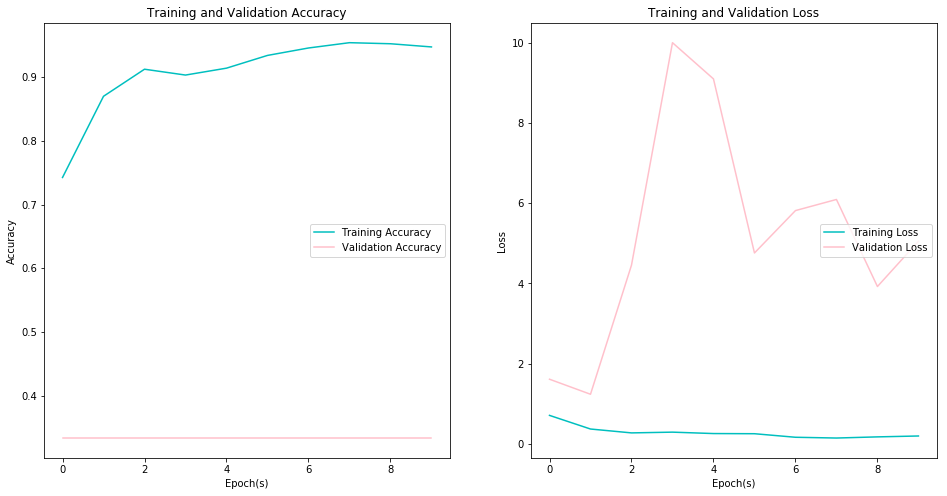

In [22]:
import seaborn as sns

acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss= history.history['val_loss']

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(16, 8))
g1 = sns.lineplot(x=range(10),
                  y=acc,
                  label='Training Accuracy',
                  color='c',
                  ax=ax1)
g2 = sns.lineplot(x=range(10),
                  y=val_acc,
                  label='Validation Accuracy',
                  color='pink',
                  ax=ax1)
g1.set_title('Training and Validation Accuracy')
g1.set_xlabel('Epoch(s)')
g1.set_ylabel('Accuracy')
g1.legend(loc='center right')

g3 = sns.lineplot(x=range(10),
                  y=loss,
                  label='Training Loss',
                  color='c',
                  ax=ax2)
g4 = sns.lineplot(x=range(10),
                  y=val_loss,
                  label='Validation Loss',
                  color='pink',
                  ax=ax2)
g3.set_title('Training and Validation Loss')
g3.set_xlabel('Epoch(s)')
g3.set_ylabel('Loss')
g3.legend(loc='center right')

plt.show()

In [94]:
for images in cropped_images:
    print(images.shape)

(1124, 467, 3)
(1209, 435, 3)
(1841, 2622, 3)
(1651, 565, 3)
(994, 361, 3)
(1120, 509, 3)
(1201, 457, 3)


In [95]:
predictions = []

for images in cropped_images:
    test_image = images
    test_image = test_image/255.
    test_image = np.expand_dims(test_image, axis=0)
  
    prediction = model.predict(test_image)
    predictions.append(prediction)
    
predictions

[array([[1.1139309e-03, 1.7950426e-06, 9.9888426e-01]], dtype=float32),
 array([[2.3761338e-07, 4.5145775e-13, 9.9999976e-01]], dtype=float32),
 array([[1.01161655e-04, 1.23853724e-07, 9.99898672e-01]], dtype=float32),
 array([[9.7453121e-06, 7.3036144e-10, 9.9999022e-01]], dtype=float32),
 array([[2.7785643e-06, 3.8065766e-11, 9.9999726e-01]], dtype=float32),
 array([[4.589900e-05, 9.991112e-09, 9.999541e-01]], dtype=float32),
 array([[2.9560803e-03, 3.9712736e-06, 9.9703997e-01]], dtype=float32)]

In [25]:
print(train_generator.class_indices)

{'non-recyclable': 0, 'organic': 1, 'recyclable': 2}


In [96]:
len(predictions)

7

Recyclable: 0.9988842606544495


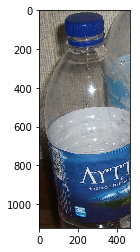

Recyclable: 0.9999997615814209


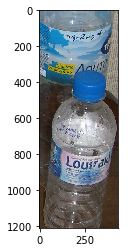

Recyclable: 0.9998986721038818


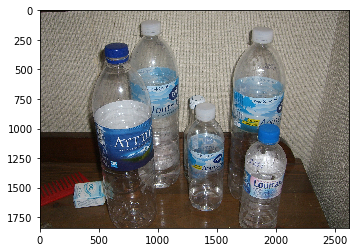

Recyclable: 0.9999902248382568


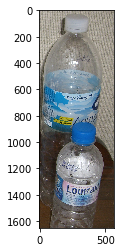

Recyclable: 0.9999972581863403


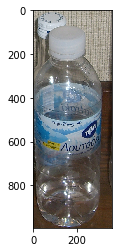

Recyclable: 0.999954104423523


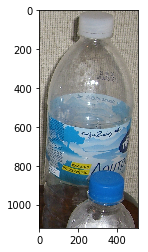

Recyclable: 0.9970399737358093


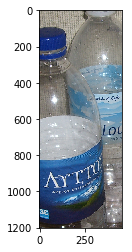

In [97]:
classes = ['Non-recyclable', 'Organic', 'Recyclable']

for i in range(len(predictions)):
    likely = predictions[i][0][0]
    likely_index = 0
    
    for j in range(len(predictions[i][0])):
        if predictions[i][0][j] > likely:
            likely = predictions[i][0][j]
            likely_index = j
    
    if likely >= 0.9:
        print('{}: {}'.format(classes[likely_index], likely))
    else:
        print('{}: {}'.format(classes[0], predictions[i][0][0]))
        print('{}: {}'.format(classes[1], predictions[i][0][1]))
        print('{}: {}'.format(classes[2], predictions[i][0][2]))
    plt.imshow(cropped_images[i])
    plt.show()